# Setting up

In [1]:
from Fantasy import Fantasy

league = "fpl"

unwanted_teams = []

higher_than = {
    "value_season": 0,
    "value_season_adj": 5,
    "form": 2,
    "minutes": 90 * 5,
    "points_per_game": 0,
}

max_cost = 200

fantasy = Fantasy(league, unwanted_teams, higher_than, max_cost)

fantasy.get_player_df().describe()


,points_per_game,now_cost,minutes,value_season,total_points,form,ict_index,value_season_adj
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,3.960204,55.479592,1913.204082,16.752041,93.183673,3.465306,105.205102,7.196545
std,1.058373,14.016360,600.887693,4.837786,36.188324,1.138647,58.893873,1.291568
min,2.100000,42.000000,497.000000,3.400000,25.000000,2.200000,11.000000,5.040000
25%,3.125000,46.000000,1503.750000,13.800000,71.250000,2.500000,65.525000,6.323223
50%,3.800000,51.000000,2030.000000,17.050000,90.500000,3.200000,95.400000,7.066633
75%,4.500000,60.000000,2366.500000,20.275000,114.750000,4.000000,125.950000,8.085127
max,8.000000,132.000000,2880.000000,25.800000,225.000000,7.000000,367.200000,10.748387


# Aggregate

To see where to focus your money, look at which positions are most valuable

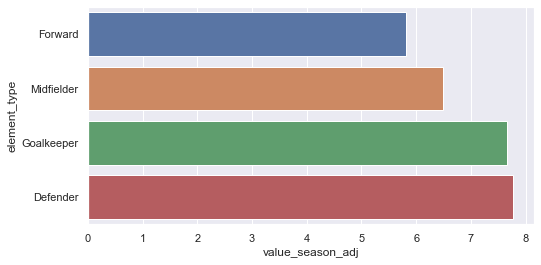

In [2]:
# Avg value per position
fantasy.get_bar_plot("element_type", "value_season_adj")


# Players overall

Top performers are must haves. They're top 10% in value, form and if you're using FPL, also ICT

In [3]:
fantasy.get_top_performers()


,web_name,team,element_type,points_per_game,now_cost,minutes,value_season,total_points,form,ict_index,value_season_adj
664,Bowen,West Ham,Midfielder,5.7,69.0,2430.0,24.1,166.0,3.2,227.3,8.275301
409,Cancelo,Man City,Defender,6.0,70.0,2507.0,24.0,168.0,5.0,186.0,8.571429
377,Robertson,Liverpool,Defender,6.4,73.0,2024.0,20.3,148.0,6.0,157.1,8.778378
380,Alexander-Arnold,Liverpool,Defender,7.2,84.0,2313.0,22.3,187.0,3.2,235.5,8.586096


Top point players are also must haves. They're the ones with the most points.

In [4]:
fantasy.get_top_points()


,web_name,team,element_type,points_per_game,now_cost,minutes,value_season,total_points,form,ict_index,value_season_adj
376,Salah,Liverpool,Midfielder,8.0,132.0,2327.0,17.0,225.0,3.2,367.2,6.044444
380,Alexander-Arnold,Liverpool,Defender,7.2,84.0,2313.0,22.3,187.0,3.2,235.5,8.586096
573,Son,Spurs,Midfielder,6.6,110.0,2333.0,16.1,177.0,6.4,262.7,6.003390


# Goalkeepers

The best performing goalkeepers

p: 0.6611030464511086


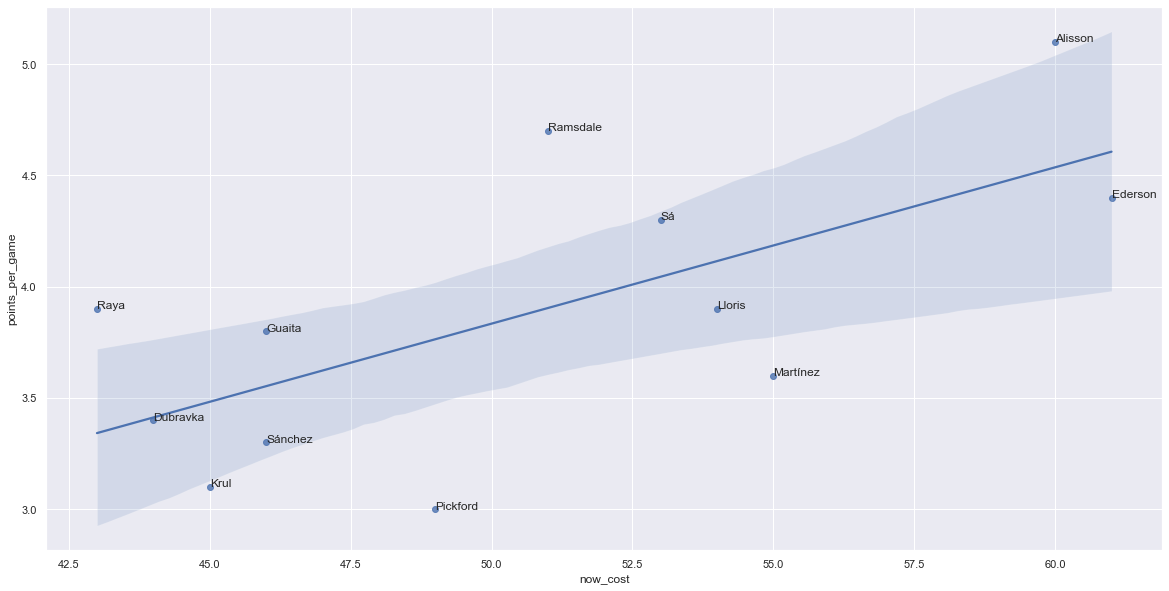

In [5]:
# Those over the line are outperforming their current price
fantasy.get_player_scatterplot("Goalkeeper", "now_cost", "points_per_game", True)

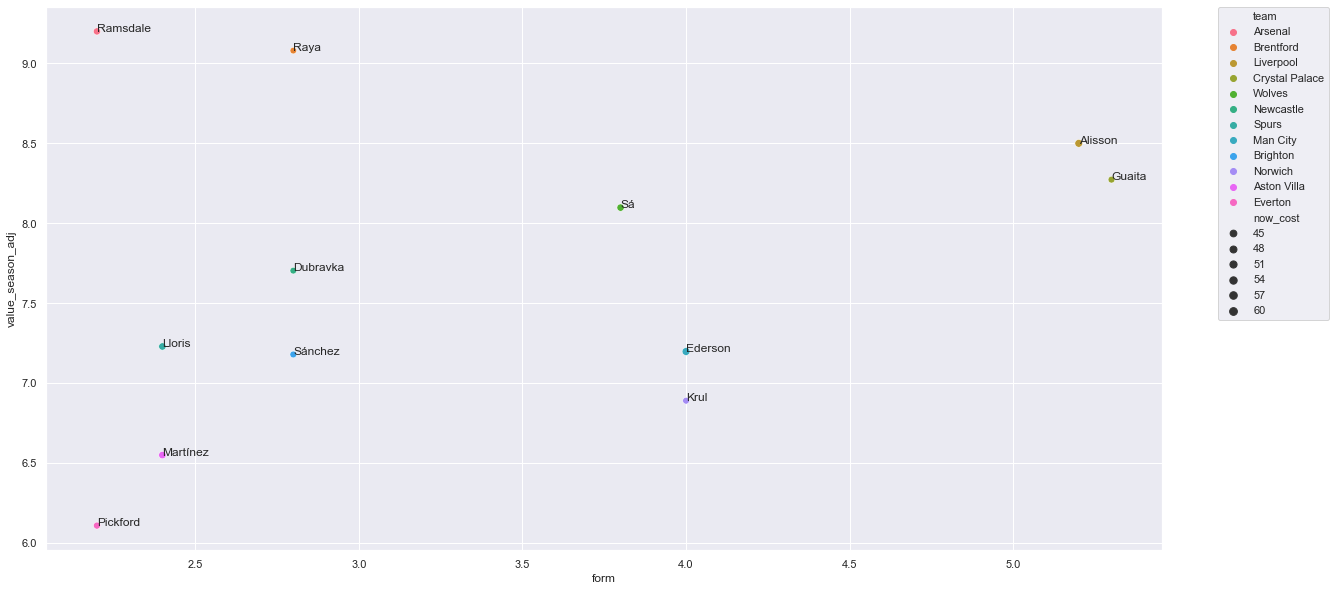

In [6]:
fantasy.get_player_scatterplot("Goalkeeper", "form", "value_season_adj")


# Defenders

p: 0.8230407142417812


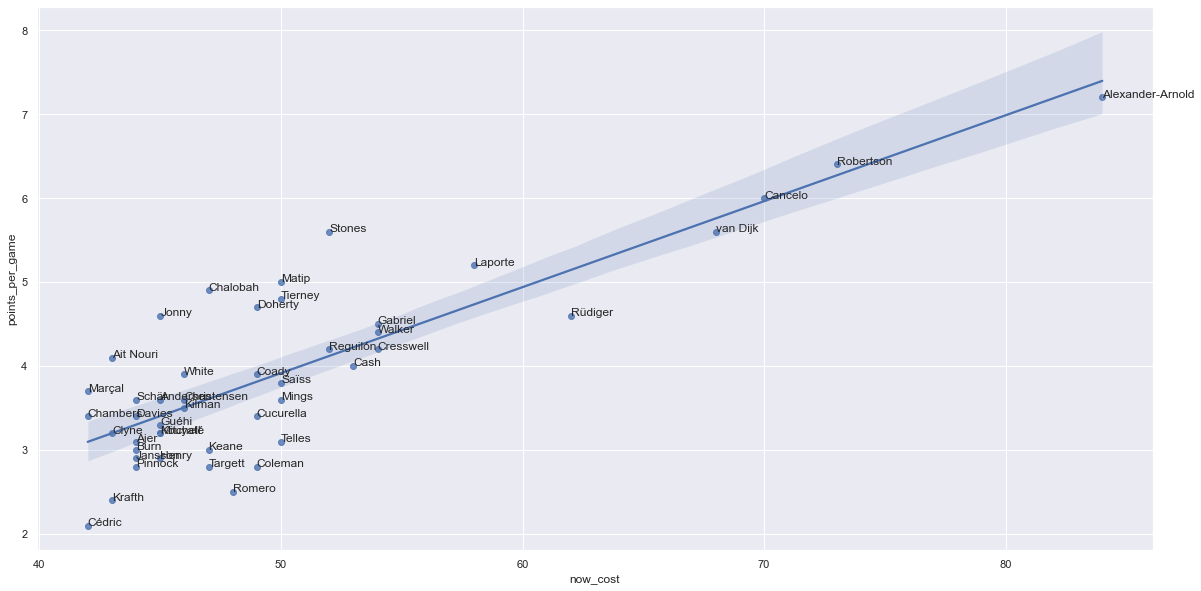

In [7]:
# Those over the line are outperforming their current price
fantasy.get_player_scatterplot("Defender", "now_cost", "points_per_game", True)

The best performing defenders

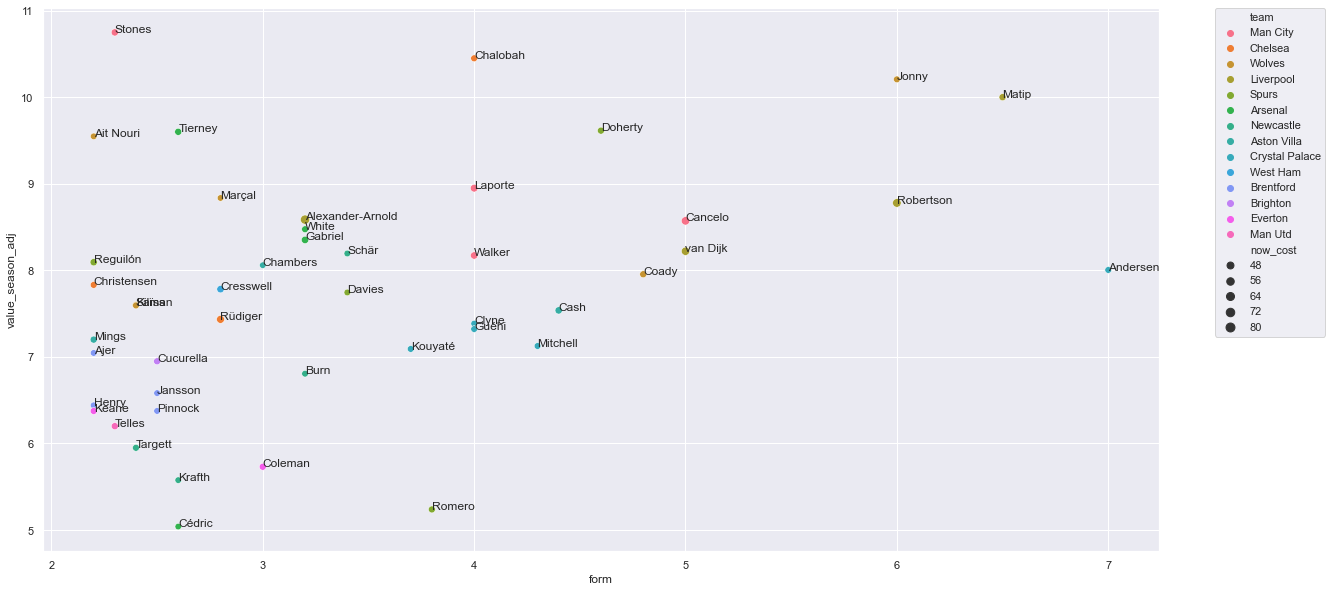

In [8]:
fantasy.get_player_scatterplot("Defender", "form", "value_season_adj")


# Midfielders

p: 0.9011333610102473


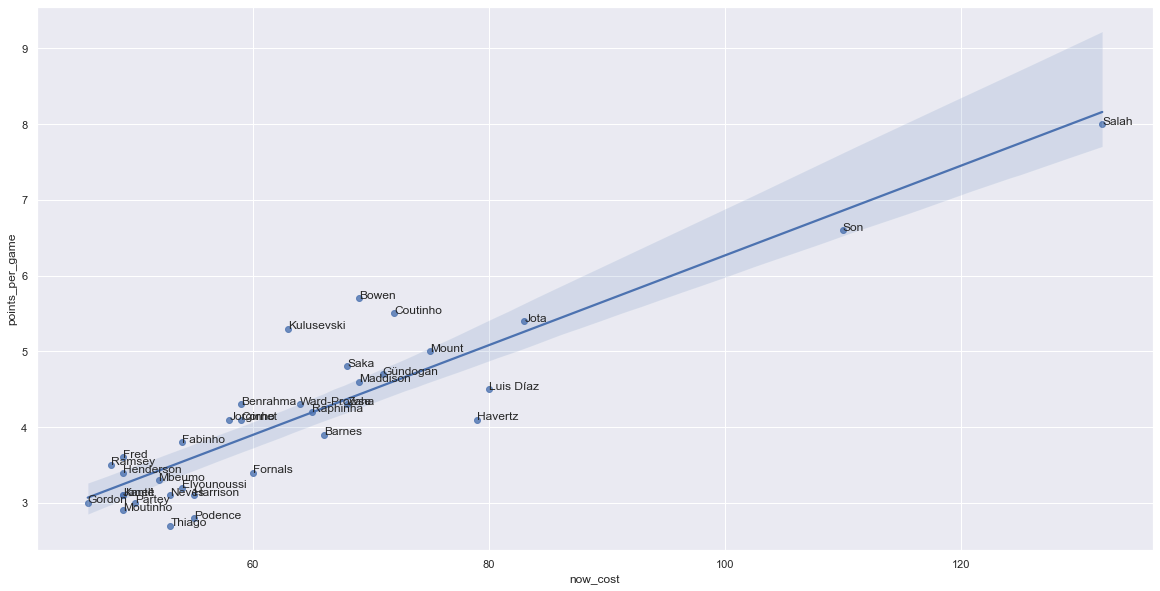

In [9]:
# Those over the line are outperforming their current price
fantasy.get_player_scatterplot("Midfielder", "now_cost", "points_per_game", True)

The best performing midfielders

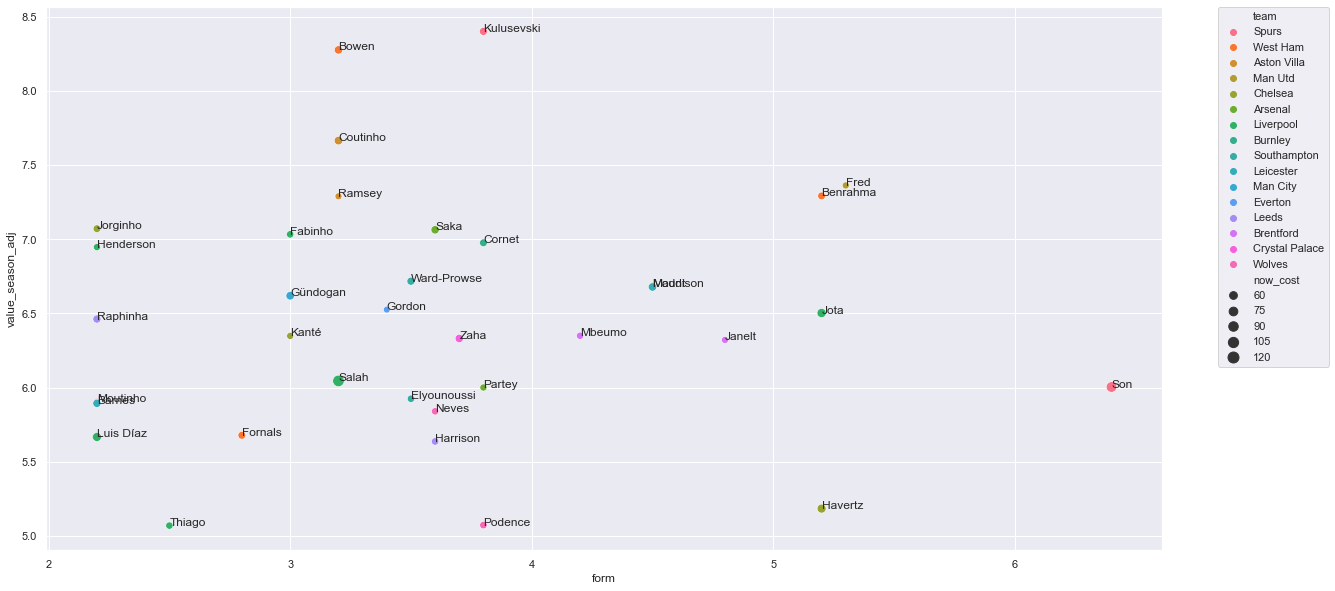

In [10]:
fantasy.get_player_scatterplot("Midfielder", "form", "value_season_adj")


# Forwards

p: 0.947266405166895


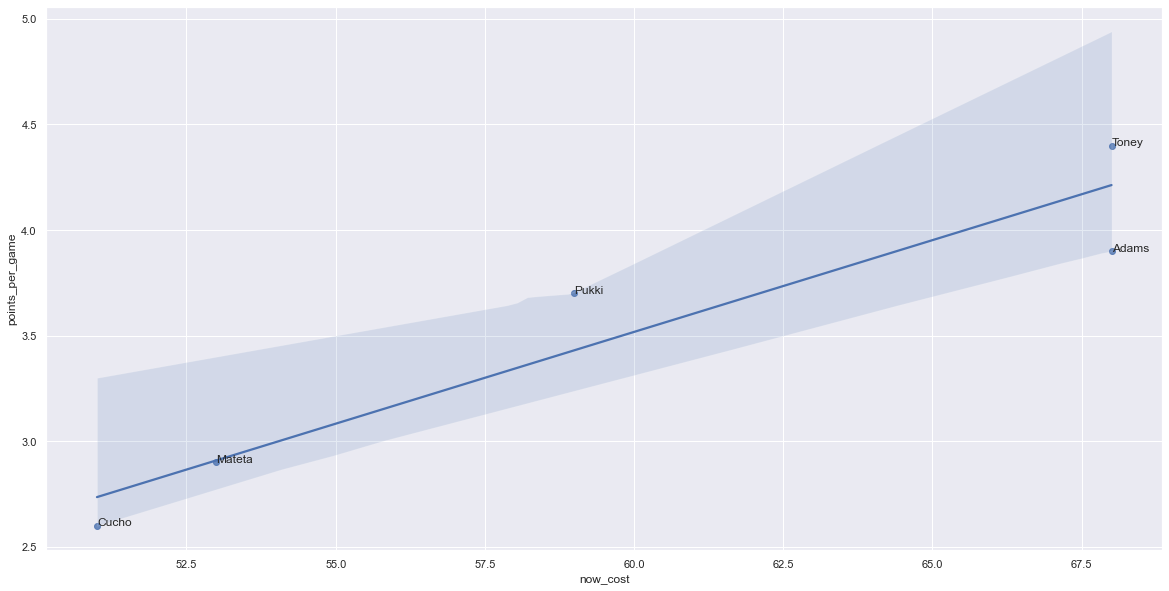

In [11]:
# Those over the line are outperforming their current price
fantasy.get_player_scatterplot("Forward", "now_cost", "points_per_game", True)

The best performing forwards

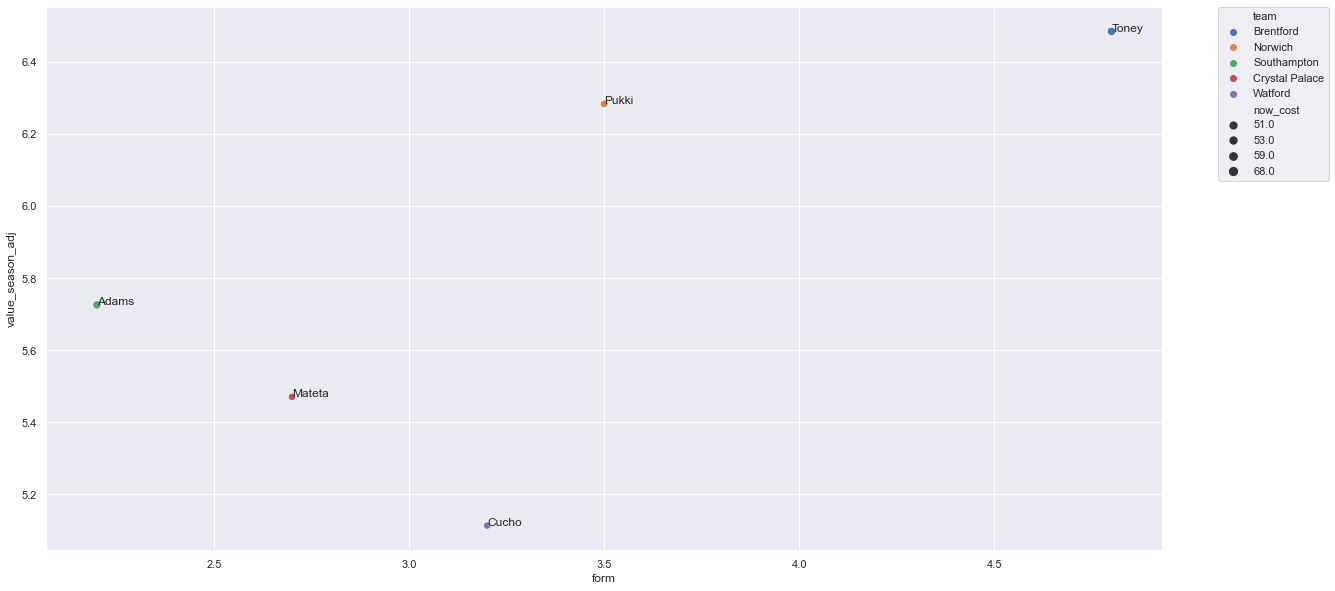

In [12]:
fantasy.get_player_scatterplot("Forward", "form", "value_season_adj")
